In [39]:
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.losses import categorical_crossentropy
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_rows = 28
img_cols = 28
num_classes = 10

print('Loading data...')
df = pd.read_csv('train.csv')
print('Shape of data file:',df.shape)

# get data excluding label column
X = df.drop('label',axis=1)

# reconstruct images from flattened rows
X = X.values.reshape(len(X),img_rows,img_cols,1)

# normalise X to lie between 0 and 1
X = X/255.0
print('Shape of network input:',X.shape)

# extract true label of each image
labels = df['label'].values

# convert labels in to dummy vectors
y = to_categorical(labels, num_classes)
print('Shape of label vectors:',y.shape)
print('First label vector:',y[0])

Loading data...
Shape of data file: (42000, 785)
Shape of network input: (42000, 28, 28, 1)
Shape of label vectors: (42000, 10)
First label vector: [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Train shape: X =',X_train.shape,', y =',y_train.shape)
print('Test shape: X =',X_test.shape,', y =',y_test.shape)

data_generator = ImageDataGenerator(        
                    rotation_range=10,
                    zoom_range = 0.1,
                    width_shift_range=0.1, 
                    height_shift_range=0.1,
                ) 

batch_size = 100
flow_train = data_generator.flow(X_train,y_train,batch_size=batch_size)
flow_test = data_generator.flow(X_test,y_test,batch_size=batch_size)

Train shape: X = (33600, 28, 28, 1) , y = (33600, 10)
Test shape: X = (8400, 28, 28, 1) , y = (8400, 10)


In [4]:
layers = [
          Conv2D(32, kernel_size=(5, 5), 
                          activation='relu',name='Conv1',
                          input_shape=(img_rows, img_cols, 1)),
          Dropout(rate=0.1),
          Conv2D(32, kernel_size=(5, 5), 
                          activation='relu',name='Conv2'),
          Dropout(rate=0.1),
          Conv2D(64, kernel_size=(3, 3), 
                          activation='relu',name='Conv3'),  
          Dropout(rate=0.2),
          Conv2D(64, kernel_size=(3, 3), 
                          activation='relu',name='Conv4'),
          Dropout(rate=0.2),
          MaxPool2D(pool_size=(2, 2), strides=2,
                          name='Pool1'),
          Flatten(name='Flatten'),
          Dense(256, activation='relu',name='Dense1'), 
          Dropout(rate=0.5),
          Dense(64, activation='relu',name='Dense2'),   
          Dropout(rate=0.5),
          Dense(num_classes, activation='softmax',
                          name='Output')
        ]

n_layers = len(layers)

# Buld model
model = Sequential()

# add each defined layer to the model
for layer in layers:
    model.add(layer)

# get layer names
layer_names = [model.layers[i].name for i in range(n_layers)]

In [5]:
# set model optimisation parameters
model.compile(loss=categorical_crossentropy,
                   optimizer='adam',
                   metrics=['accuracy'])

# Fit model
history = model.fit_generator(
              flow_train,
              epochs=30,
              validation_data = flow_test)

Epoch 1/30
336/336 [==============================] - 422s 1s/step - loss: 0.5252 - acc: 0.8323 - val_loss: 0.1572 - val_acc: 0.9560
Epoch 2/30
336/336 [==============================] - 399s 1s/step - loss: 0.1669 - acc: 0.9495 - val_loss: 0.1103 - val_acc: 0.9654
Epoch 3/30
336/336 [==============================] - 399s 1s/step - loss: 0.1246 - acc: 0.9619 - val_loss: 0.0868 - val_acc: 0.9751
Epoch 4/30
336/336 [==============================] - 403s 1s/step - loss: 0.0989 - acc: 0.9702 - val_loss: 0.0671 - val_acc: 0.9810
Epoch 5/30
336/336 [==============================] - 404s 1s/step - loss: 0.0864 - acc: 0.9749 - val_loss: 0.0712 - val_acc: 0.9789
Epoch 6/30
336/336 [==============================] - 397s 1s/step - loss: 0.0821 - acc: 0.9754 - val_loss: 0.0554 - val_acc: 0.9838
Epoch 7/30
336/336 [==============================] - 385s 1s/step - loss: 0.0721 - acc: 0.9783 - val_loss: 0.0672 - val_acc: 0.9808
Epoch 8/30
336/336 [==============================] - 410s 1s/step - 

Text(0.5,0,'Epoch')

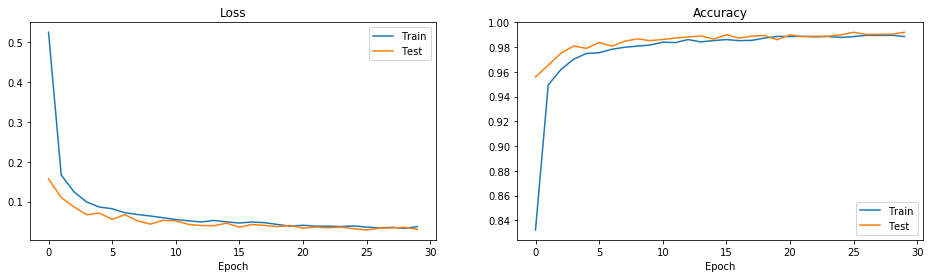

In [24]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'],label="Test")
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')

In [26]:
print('Loading data...')
df = pd.read_csv('test.csv')
print('Shape of test.csv:',df.shape)

# reconstruct images from flattened rows
X_pred = df.values.reshape(len(df),img_rows,img_cols,1)

# normalise X to lie between 0 and 1
X_pred = X_pred/255.0

print('Shape of images:',X_pred.shape)

Loading data...
Shape of test.csv: (28000, 784)
Shape of images: (28000, 28, 28, 1)


In [34]:
print('Making predictions...')
y_pred = model.predict_classes(X_pred)
print('Shape of prediction:',y_pred.shape)
plt.hist(y_pred)

Making predictions...
Shape of prediction: (28000,)


NameError: name 'np' is not defined

In [58]:
df_pred = pd.DataFrame(y_pred,index=np.arange(1,len(y_pred)+1),columns=['Label'])
df_pred.index.name = 'ImageId'
df_pred.to_csv('submission.csv')

df_pred.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
